In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [62]:
df=pd.read_csv('E:/data sets dowload/breast-cancer.csv')

In [63]:
df.head(4)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN


In [65]:
df=df.drop(['id','Unnamed: 32'],axis=1)

In [66]:
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [67]:
#coverting into binary of dependent

df['diagnosis']=df['diagnosis'].map({'M':0,'B':1}).astype(int)

In [68]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [69]:
import sklearn

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X=df.iloc[:,1:]
y=df.iloc[:,0:1]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [73]:
len(X_train),len(y_train)

(381, 381)

# import packages and modules to develop ann model

In [74]:
import tensorflow

In [75]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.activations import sigmoid,relu,tanh,softmax


In [76]:
model=Sequential()

#dealing with frist hidden layer and agiving number of neurons  for x variabbe
model.add(Dense(units=256,kernel_initializer='he_uniform',activation='relu',input_dim=X.shape[1]))
#second hiddeen layer
model.add(Dense(units=128,kernel_initializer='he_uniform',activation='relu'))
#third hiddenlayer
model.add(Dense(units=64,kernel_initializer='he_uniform',activation='relu'))
#fourth hiddenlayer
model.add(Dense(units=32,kernel_initializer='he_uniform',activation='relu'))
#ffifth hiddenlayer
model.add(Dense(units=16,kernel_initializer='he_uniform',activation='relu'))
#Sixth hidden layer
model.add(Dense(units=8,kernel_initializer='he_uniform',activation='relu'))
# seventh
model.add(Dense(units=4,kernel_initializer='he_uniform',activation='relu'))
#eight
model.add(Dense(units=2,kernel_initializer='he_uniform',activation='relu'))
#output layer
model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))#why because only two labels

In [77]:
X.shape[1]

30

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 256)               7936      
                                                                 
 dense_38 (Dense)            (None, 128)               32896     
                                                                 
 dense_39 (Dense)            (None, 64)                8256      
                                                                 
 dense_40 (Dense)            (None, 32)                2080      
                                                                 
 dense_41 (Dense)            (None, 16)                528       
                                                                 
 dense_42 (Dense)            (None, 8)                 136       
                                                                 
 dense_43 (Dense)            (None, 4)                

In [57]:
#parameter concept and also written notes 
model1=Sequential()
#dealing with frist hidden layer and agiving number of neurons  for x variabbe
model1.add(Dense(units=4,kernel_initializer='he_uniform',activation='relu',input_dim=2))
#second hiddeen layer
model1.add(Dense(units=3,kernel_initializer='he_uniform',activation='relu'))
#output layer
model1.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='relu'))


In [58]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 4)                 12        
                                                                 
 dense_53 (Dense)            (None, 3)                 15        
                                                                 
 dense_54 (Dense)            (None, 1)                 4         
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [79]:
#this is for back trapping
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [80]:
#fitting
model.fit(X_train,y_train,epochs=50,batch_size=10)

Epoch 1/50
39/39 [==============================] - 5s 12ms/step - loss: 0.7228 - accuracy: 0.6247
Epoch 2/50
39/39 [==============================] - 0s 9ms/step - loss: 0.6893 - accuracy: 0.6194
Epoch 3/50
39/39 [==============================] - 0s 11ms/step - loss: 0.6869 - accuracy: 0.6194
Epoch 4/50
39/39 [==============================] - 0s 9ms/step - loss: 0.6848 - accuracy: 0.6194
Epoch 5/50
39/39 [==============================] - 0s 8ms/step - loss: 0.6826 - accuracy: 0.6194
Epoch 6/50
39/39 [==============================] - 0s 9ms/step - loss: 0.6811 - accuracy: 0.6194
Epoch 7/50
39/39 [==============================] - 0s 10ms/step - loss: 0.6798 - accuracy: 0.6194
Epoch 8/50
39/39 [==============================] - 0s 8ms/step - loss: 0.6783 - accuracy: 0.6194
Epoch 9/50
39/39 [==============================] - 0s 8ms/step - loss: 0.6769 - accuracy: 0.6194
Epoch 10/50
39/39 [==============================] - 0s 8ms/step - loss: 0.6756 - accuracy: 0.6194
Epoch 11/50
39/3

In [81]:
#by kepping validation
model.fit(X_train,y_train,epochs=50,batch_size=10,validation_split=0.1)


Epoch 1/50
35/35 [==============================] - 2s 64ms/step - loss: 0.6696 - accuracy: 0.6082 - val_loss: 0.6203 - val_accuracy: 0.7179
Epoch 2/50
35/35 [==============================] - 1s 18ms/step - loss: 0.6696 - accuracy: 0.6082 - val_loss: 0.6206 - val_accuracy: 0.7179
Epoch 3/50
35/35 [==============================] - 1s 19ms/step - loss: 0.6697 - accuracy: 0.6082 - val_loss: 0.6202 - val_accuracy: 0.7179
Epoch 4/50
35/35 [==============================] - 1s 20ms/step - loss: 0.6696 - accuracy: 0.6082 - val_loss: 0.6207 - val_accuracy: 0.7179
Epoch 5/50
35/35 [==============================] - 1s 17ms/step - loss: 0.6696 - accuracy: 0.6082 - val_loss: 0.6211 - val_accuracy: 0.7179
Epoch 6/50
35/35 [==============================] - 0s 13ms/step - loss: 0.6696 - accuracy: 0.6082 - val_loss: 0.6214 - val_accuracy: 0.7179
Epoch 7/50
35/35 [==============================] - 0s 13ms/step - loss: 0.6696 - accuracy: 0.6082 - val_loss: 0.6211 - val_accuracy: 0.7179
Epoch 8/50
35

# Checking with small architecture

In [129]:
model2=Sequential()
#dealing with frist hidden layer and agiving number of neurons  for x variabbe
model2.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=X.shape[1]))
#second hiddeen layer
model2.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))
#output layer
model2.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))



In [130]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [131]:
model2.fit(X_train,y_train,epochs=50,batch_size=10,validation_split=0.1)

Epoch 1/50
35/35 [==============================] - 3s 32ms/step - loss: 308.2169 - accuracy: 0.6082 - val_loss: 176.0002 - val_accuracy: 0.7179
Epoch 2/50
35/35 [==============================] - 0s 11ms/step - loss: 218.8964 - accuracy: 0.6082 - val_loss: 126.4042 - val_accuracy: 0.7179
Epoch 3/50
35/35 [==============================] - 0s 12ms/step - loss: 154.9417 - accuracy: 0.6082 - val_loss: 81.7835 - val_accuracy: 0.7179
Epoch 4/50
35/35 [==============================] - 0s 12ms/step - loss: 78.0946 - accuracy: 0.6082 - val_loss: 22.9441 - val_accuracy: 0.7179
Epoch 5/50
35/35 [==============================] - 0s 11ms/step - loss: 10.2460 - accuracy: 0.4678 - val_loss: 3.0086 - val_accuracy: 0.2564
Epoch 6/50
35/35 [==============================] - 0s 11ms/step - loss: 1.3987 - accuracy: 0.4591 - val_loss: 1.4612 - val_accuracy: 0.5128
Epoch 7/50
35/35 [==============================] - 1s 15ms/step - loss: 1.1366 - accuracy: 0.4766 - val_loss: 1.4083 - val_accuracy: 0.4615

In [132]:
#from above it is clear that it is working for small architeture

In [133]:
model2.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [134]:
model2.history.history['accuracy']

[0.6081871390342712,
 0.6081871390342712,
 0.6081871390342712,
 0.6081871390342712,
 0.46783626079559326,
 0.4590643346309662,
 0.47660818696022034,
 0.5087719559669495,
 0.5584795475006104,
 0.5730994343757629,
 0.5877193212509155,
 0.6228070259094238,
 0.6578947305679321,
 0.6959064602851868,
 0.707602322101593,
 0.7251461744308472,
 0.7690058350563049,
 0.7748538255691528,
 0.8157894611358643,
 0.8245614171028137,
 0.8274853825569153,
 0.8391813039779663,
 0.8070175647735596,
 0.8450292348861694,
 0.8333333134651184,
 0.8274853825569153,
 0.8654970526695251,
 0.8508771657943726,
 0.871345043182373,
 0.8654970526695251,
 0.8567251563072205,
 0.8421052694320679,
 0.871345043182373,
 0.8421052694320679,
 0.859649121761322,
 0.8801169395446777,
 0.871345043182373,
 0.8771929740905762,
 0.871345043182373,
 0.8830409646034241,
 0.8771929740905762,
 0.8859649300575256,
 0.8830409646034241,
 0.8859649300575256,
 0.8830409646034241,
 0.8859649300575256,
 0.8947368264198303,
 0.87719297409057

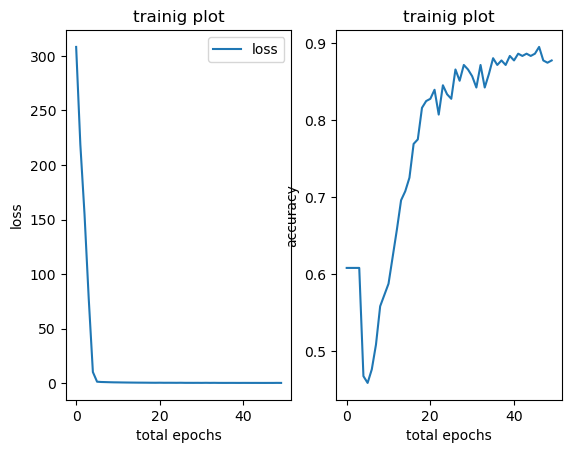

In [135]:
plt.subplot(1,2,1)
plt.title('trainig plot')
plt.plot(np.arange(50),model2.history.history['loss'],label='loss')
plt.legend(loc=0)
plt.xlabel('total epochs')
plt.ylabel('loss')
plt.subplot(1,2,2)
plt.title('trainig plot')
plt.plot(np.arange(50),model2.history.history['accuracy'])
plt.xlabel('total epochs')
plt.ylabel('accuracy')
plt.show()



In [136]:
#from above it is clear that loss is reduced and accuracy is increased

# test data report

In [137]:
X_test.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
204,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
70,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
131,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
431,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,0.02799,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
540,11.54,14.44,74.65,402.9,0.09984,0.1120,0.06737,0.02594,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134


In [138]:
X_test.shape

(188, 30)

In [149]:
y_test.head()

,diagnosis
204,1
70,0
131,0
431,1
540,1


In [160]:
bb=X_test.iloc[0,:]
bb1=np.array([bb])
print(bb1)


[[1.247e+01 1.860e+01 8.109e+01 4.819e+02 9.965e-02 1.058e-01 8.005e-02
  3.821e-02 1.925e-01 6.373e-02 3.961e-01 1.044e+00 2.497e+00 3.029e+01
  6.953e-03 1.911e-02 2.701e-02 1.037e-02 1.782e-02 3.586e-03 1.497e+01
  2.464e+01 9.605e+01 6.779e+02 1.426e-01 2.378e-01 2.671e-01 1.015e-01
  3.014e-01 8.750e-02]]


In [150]:
checking=X_test.head(1).values

In [151]:
checking

array([[1.247e+01, 1.860e+01, 8.109e+01, 4.819e+02, 9.965e-02, 1.058e-01,
        8.005e-02, 3.821e-02, 1.925e-01, 6.373e-02, 3.961e-01, 1.044e+00,
        2.497e+00, 3.029e+01, 6.953e-03, 1.911e-02, 2.701e-02, 1.037e-02,
        1.782e-02, 3.586e-03, 1.497e+01, 2.464e+01, 9.605e+01, 6.779e+02,
        1.426e-01, 2.378e-01, 2.671e-01, 1.015e-01, 3.014e-01, 8.750e-02]])

In [ ]:
#cheking and bb are containg same values means have taken values 0f 207 in x_test

In [159]:
model2.predict(checking)

1/1 [==============================] - 0s 78ms/step


array([[0.7037333]], dtype=float32)

In [ ]:
#in above as probabability is more than 0.7 it belongs to 1,we can also check in y_test it is 1

In [147]:
y_test.head()

,diagnosis
204,1
70,0
131,0
431,1
540,1


In [175]:
xtest_data=model2.predict(X_test)

6/6 [==============================] - 0s 22ms/step


In [176]:
xtest_data

array([[7.03731418e-01],
       [1.04596882e-06],
       [7.00714206e-03],
       [9.93277967e-01],
       [9.76043940e-01],
       [2.77415675e-05],
       [2.98262499e-08],
       [9.07736085e-03],
       [9.91848350e-01],
       [9.74919558e-01],
       [9.10969138e-01],
       [9.04576911e-04],
       [9.27978814e-01],
       [2.42117327e-02],
       [9.91895258e-01],
       [1.42710237e-02],
       [9.27343428e-01],
       [9.87520337e-01],
       [9.89677250e-01],
       [3.13489836e-05],
       [8.94321978e-01],
       [9.40910518e-01],
       [9.87334079e-06],
       [9.84167516e-01],
       [9.67077971e-01],
       [9.02907908e-01],
       [9.88363087e-01],
       [9.78348255e-01],
       [9.65452313e-01],
       [9.95442133e-06],
       [9.75729942e-01],
       [9.87281740e-01],
       [4.65160459e-01],
       [9.41116750e-01],
       [9.87423956e-01],
       [9.35241401e-01],
       [1.60438810e-02],
       [6.63541853e-01],
       [6.98773540e-04],
       [3.59586149e-01],


In [173]:
xtest_data.shape

(188, 1)

In [174]:
X_test.shape

(188, 30)

In [180]:
c=[]
for i in xtest_data:#outer list
    for j in i:#inner list
        if j>0.5:
            c.append(1)
        else:
            c.append(0)
        
    
    

In [181]:
print(c)

[1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1]


In [182]:
#finding accuracy

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix 

In [183]:
accuracy_score(y_test,c)

0.925531914893617

In [185]:
confusion_matrix(y_test,c)

array([[ 61,   6],
       [  8, 113]], dtype=int64)

In [186]:
print(classification_report(y_test,c))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90        67
           1       0.95      0.93      0.94       121

    accuracy                           0.93       188
   macro avg       0.92      0.92      0.92       188
weighted avg       0.93      0.93      0.93       188

